# <font color=#023F7C> **Data Visualization** </font>

<font color=#023F7C>**Hi! PARIS DataBootcamp 2024 🚀**</font> <br>


<img src = https://www.hi-paris.fr/wp-content/uploads/2020/09/logo-hi-paris-retina.png width = "300" height = "200" >

**Name**: SENG Hok          <br>
**School**: Ecole polytechnique         <br>
**Group number**: 24    <br>
**Track**: Beginner

**<font size='4'><u>Goal of this practical session</u>**</font> <br>

The goal of this practical session is create plots using the olympic games data you cleaned during the Data Cleaning practical session. <br>These plots should allow you to discover and visualize interesting patterns in the data.

**<font size='4'><u>What is Data visualization ? 📝</u>**</font> <br>

**Data visualization** is the representation of data and information in graphical or visual formats. <br>
It involves creating visualizations such as charts, graphs, maps, and other visual elements to help understand patterns, trends, and relationships within the data.

Data visualization is a fundamental component of **Exploratory Data Analysis** (EDA). It is often used for:
- **Data Understanding**: Data visualization provides a way to quickly grasp the distribution, central tendency, dispersion, and other key characteristics of the data. By visualizing the data, analysts can detect outliers, gaps, clusters, and potential issues that might not be immediately apparent from the raw data.
- **Pattern Discovery**: Visualizations help to identify patterns and trends that might not be obvious in tabular or raw data formats. Patterns that emerge from visualizations can lead to hypotheses or guide further analysis.
- **Relationship Exploration**: Visualization can reveal relationships between variables, such as correlations or dependencies, which can be vital for understanding how different factors interact with each other.

**<font size='4'><u>Bootcamp deliverables 💯</u>**</font> <br>

Send both the notebooks and the slides at `data-event@hi-paris.fr`

- <u>**Friday 12:30 PM**</u>: <br> **Send us the "Data visualisation" and "Machine Learning, Explainability and Deep Learning" notebooks (no need to send us data cleaning)** 
    - **Each group member should send his own notebooks** (we won't accept one notebook per group)
    - Don't forget to complete the start of the notebook with your information (name, school, group number and track)
    
    <br>
    
- <u>**Friday 2:30PM**</u>: <br>**Send us the group slides**<br>
    - You can send us a single powerpoint per group (no need to send us one per group member)
    - Don't forget to add your group number as well as who is in your group (name, school and track) to the slides

**<font size='4'><u>Before you start to working on this notebook ⚠️</u>**</font> <br>

Please download/copy this notebook from `hfactory_magic_folders\course` and drop it into your own directory `my_work` on HFactory. <br>
If you don't, you won't be able to save the modifications you've made on this notebook.

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) #Show all columns

## 1. Import the cleaned data




**Question 1:** <br>
**Load the dataframe you cleaned in the `Data_cleaning.ipynb` notebook and saved as `athlete_events_clean.csv`**


*If you haven't finished the data cleaning notebook, please go back to it before starting this practical session. <br> Don't forget to also save the cleaned dataset, as you will need for this session.*

*If you are having **difficulties with data cleaning**, you can run the following two cells loading a clean dataset. <br>
These cells will load the original dataset as `dataset` and clean it using the `data_preparation` and `preparation` functions.<br>*

In [3]:
# Run the following two cells if you don't want to or can't use the dataframe you cleaned in Monday's notebook.

def data_preparation(path=r'~/hfactory_magic_folders/course/data/athlete_events.csv'):
  dataset = pd.read_csv(path)
  dataset["Medal"] = dataset["Medal"].fillna("None")
  dataset = dataset.dropna(subset=['Height','Weight']).reset_index(drop=True)
  fill_age = int(dataset["Age"].mean())
  dataset["Age"] = dataset["Age"].fillna(fill_age)
  return dataset

dataset = data_preparation()

In [4]:
def preparation(dataset):
  regions = pd.read_csv(r'~/hfactory_magic_folders/course/data/noc_regions.csv')
  dataset["Medal"] = dataset["Medal"].fillna("None")
  dataset = dataset.dropna(subset=['Height','Weight']).reset_index(drop=True)
  fill_age = int(dataset["Age"].mean())
  dataset["Age"] = dataset["Age"].fillna(fill_age)

  dict_regions = dict(zip(regions["NOC"].to_list(), regions["region"].to_list()))
  countries = dataset["NOC"].map(dict_regions)
  dataset.insert(8, "Country", countries) ##Add other ? add beter ?
  dict_host_country = {
    "Seoul":"South Korea",
    "Barcelona":"Spain",
    "Atlanta":"USA",
    "Sydney":"Australia",
    "Athina":"Greece",
    "Beijing":"China",
    "Melbourne":"Australia",
    "Los Angeles":'USA',
    "St. Louis": 'USA',
    "Moskva":"Russia",
    "Montreal":"Canada",
    "Munich" :"Germany",
    "Berlin":"Germany",
    "Mexico City":"Mexico",
    "Tokyo":"Japan",
    "Roma":"Italy",
    "Paris":"France",
    "Helsinki": "Finland",
    "Amsterdam":"Netherlands",
    "Antwerpen": "Belgium",
    "Stockholm": "Sweden",
    "Rio de Janeiro":"Brazil",
    "London":"UK"}
  dataset["Host_country"] = dataset["City"].map(dict_host_country)
  dataset["Won_host_country"] = dataset["Host_country"] == dataset["Country"]
  dataset.reset_index(drop=True, inplace=True)
  return dataset

dataset = preparation(dataset)

Don't run the previous three cells if you are using your own cleaned data. <br>
Use the following cell to do so.

In [5]:
# Load your own clean data 
dataset.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Country,Games,Year,Season,City,Sport,Event,Medal,Host_country,Won_host_country
206848,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,Poland,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,None,NaN,False
206849,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,Poland,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",None,NaN,False
206850,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,Poland,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",None,NaN,False
206851,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,Poland,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,None,NaN,False
206852,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,Poland,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,None,NaN,False


## 2. Create visualization plots

**Question 2**: <br>
**Display the pie chart of the proportion of each unique value of 'Medal' (print the %)** <br>

*<u>Help</u>: Go to https://python-graph-gallery.com/pie-plot/ to find examples of pie plots.* <br>
- *You can use Pandas' `.value_counts()` function to get the proportion of each unique value*
- *You can use the parameter `autopct="%.2f%%"` to get the percentage instead of the count in `plt.pie()`*
- *You can also use pandas' `.plot.pie()` function to plot from a dataframe*

Text(0.5, 1.0, 'Proportion of Each Medal Type')

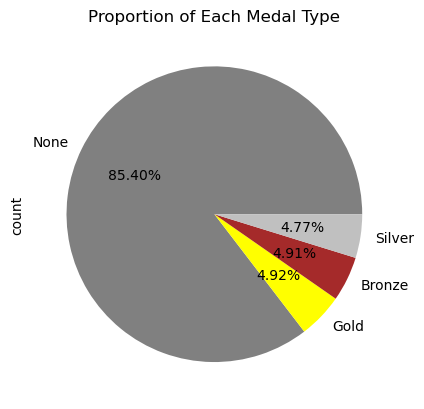

In [6]:
medal_counts = dataset.value_counts("Medal")

medal_counts.plot.pie(autopct="%.2f%%", colors =["grey","yellow","brown","silver"])
plt.title('Proportion of Each Medal Type')

([<matplotlib.patches.Wedge at 0x7f6eb1851720>,
 [Text(0.5397933801431496, 0.9584482806879218, 'Gold'),
  Text(-1.0994854537697154, -0.03364129826274827, 'Bronze'),
  Text(0.568853103626018, -0.9414914479139186, 'Silver')],
 [Text(0.2944327528053543, 0.5227899712843209, '33.67%'),
  Text(-0.5997193384198447, -0.018349799052408144, '33.63%'),
  Text(0.3102835110687371, -0.5135407897712283, '32.70%')])

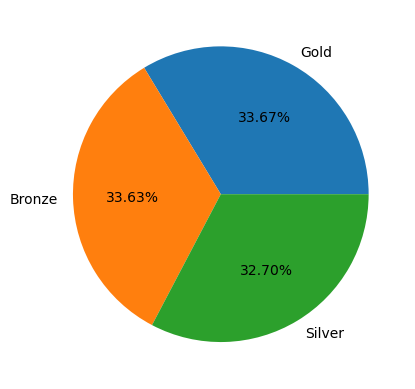

In [7]:

Count_medal=dataset['Medal'].value_counts().to_frame("count").reset_index()
Count_medal_nonone=Count_medal[Count_medal['Medal']!='None']
plt.pie(Count_medal_nonone['count'], labels=Count_medal_nonone['Medal'],autopct="%.2f%%")


**Question 3**: <br>
**Print the number of medal for each OG in Summer and after in Winter.**
You can use 'sns.barplot'.

First, you have to create a new column, "has_medal", which is equal to 1 if an athelte won a medal, 0 if not.

(Optional question) : Show the labels of the bars with a 80° degree rotation




In [8]:
def my_function(medal):
    if medal == 'None':
        return 0
    return 1

In [9]:
dataset['has_medal'] = dataset['Medal'].apply(my_function)

In [10]:
dataset['has_medal'] = dataset['Medal'].apply(lambda x: 0 if x == "None" else 1)

In [11]:
dataset_season = dataset[['Season','Year','has_medal']].groupby(['Season','Year']).sum().reset_index()

In [12]:
dataset[['Season','Year','has_medal']].groupby(['Season','Year']).sum().reset_index()

,Season,Year,has_medal
0,Summer,1896,20
1,Summer,1900,38
2,Summer,1904,60
3,Summer,1906,69
4,Summer,1908,138
5,Summer,1912,131
6,Summer,1920,183
7,Summer,1924,170
8,Summer,1928,164
9,Summer,1932,166


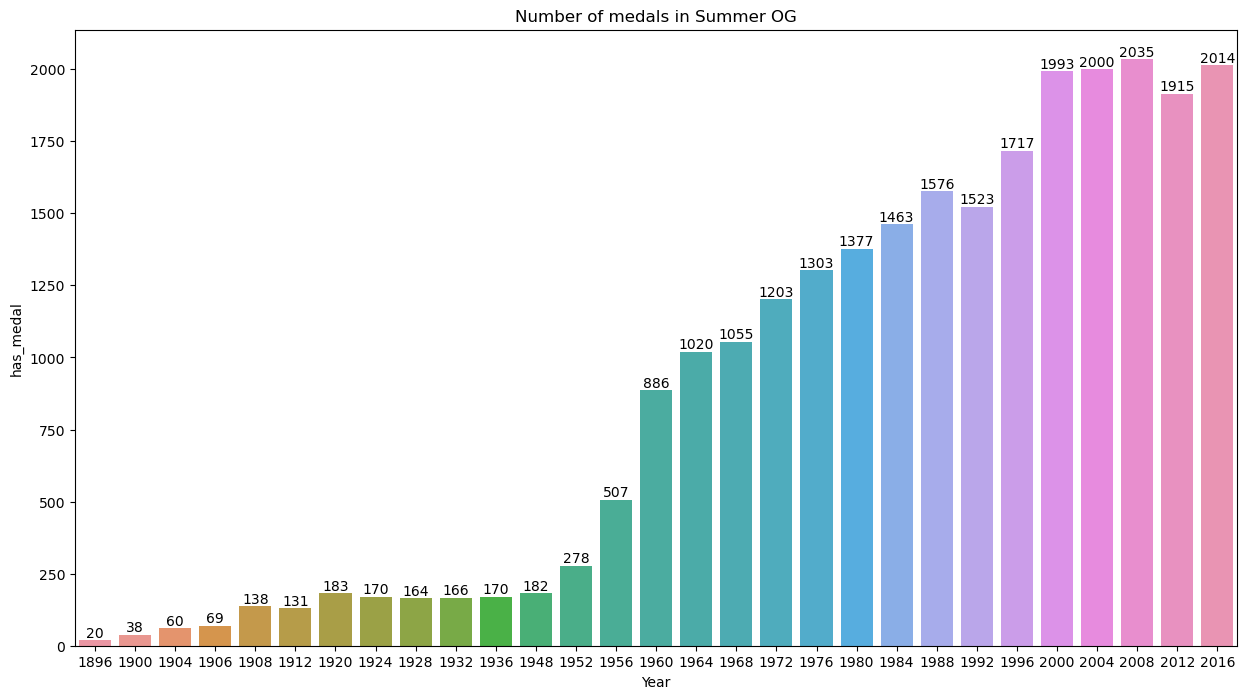

In [13]:
dataset_summer = dataset[dataset["Season"]=="Summer"]
dataset_summer.head()

summer_medals = dataset_summer.groupby(["Year"])["has_medal"].sum().reset_index()

plt.figure(figsize=(15,8))
plt.title("Number of medals in Summer OG")
chart = sns.barplot(x = 'Year',
            y = 'has_medal',
            data = summer_medals)
for i in chart.containers:
    chart.bar_label(i,rotation = 0)
plt.show()


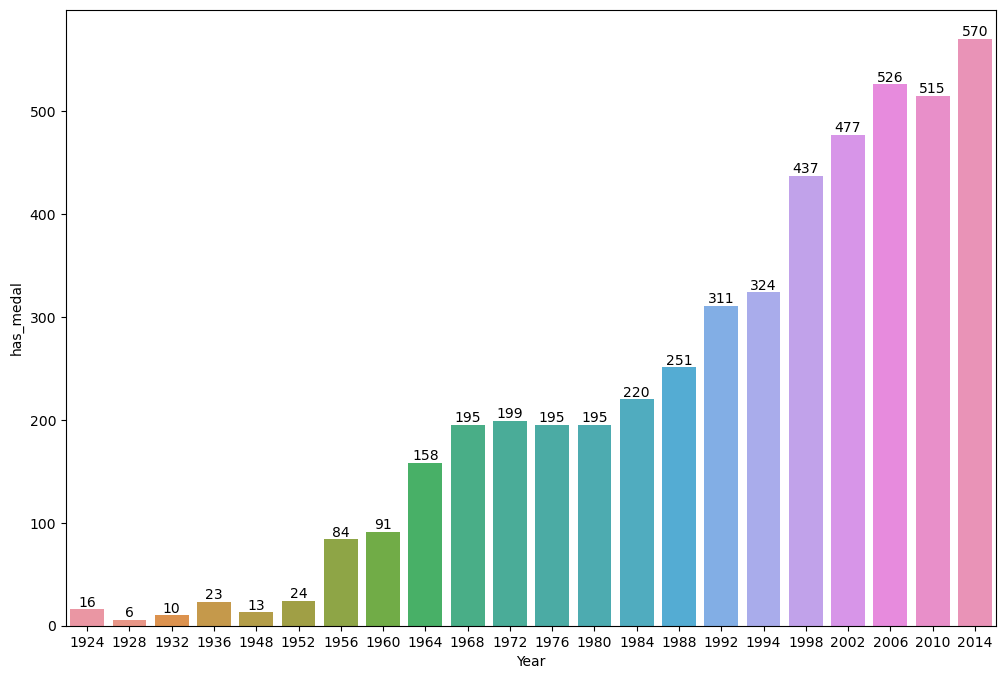

In [14]:
dataset_winter = dataset[dataset["Season"]=="Winter"]
dataset_winter.head()

winter_medals = dataset_winter.groupby(["Year"])["has_medal"].sum().reset_index()

plt.figure(figsize=(12,8))
chart = sns.barplot(x = 'Year',
            y = 'has_medal',
            data = winter_medals)
for i in chart.containers:
    chart.bar_label(i,rotation = 0)
plt.show()

**Question 4**: <br>
**Show the average number of medals won when a country hosts the Olympic Games and when it does not.** <br>
**But for this question, take only the summer Olympics after 1950.**



In [16]:
summer_after50 = dataset[(dataset["Season"] == "Summer") & (dataset["Year"] >= 1950)]




host_list = summer_after50[summer_after50['Won_host_country']==True]['Country'].unique()

df_hosted = summer_after50[summer_after50['Country'].isin(host_list)].groupby(['Country','Year','Won_host_country'])['has_medal'].sum().reset_index()


In [17]:
hostwon_mean = int(df_hosted[df_hosted['Won_host_country'] == True]['has_medal'].mean())
print("Average number of medals won when a country hosted the summer OG is",hostwon_mean)

Average number of medals won when a country hosted the summer OG is 122


In [18]:
nonhostwon_mean = int(df_hosted[df_hosted['Won_host_country'] == False]['has_medal'].mean())
print("Average number of medals won when a country did not host the summer OG is",nonhostwon_mean)

Average number of medals won when a country did not host the summer OG is 54


**Question 4 bis**: <br>
 Why are the averages so high?



In [19]:
dataset[(dataset['Country']== 'USA') & (dataset['Year']==1992) & (dataset['has_medal']==1)]['Sport'].value_counts()

Sport
Swimming                     56
Athletics                    48
Basketball                   24
Volleyball                   24
Sailing                      16
Gymnastics                   11
Rowing                       10
Wrestling                     8
Short Track Speed Skating     5
Equestrianism                 5
Tennis                        4
Canoeing                      3
Synchronized Swimming         3
Diving                        3
Boxing                        3
Figure Skating                3
Speed Skating                 2
Freestyle Skiing              2
Shooting                      2
Cycling                       2
Alpine Skiing                 2
Judo                          1
Name: count, dtype: int64

Number of medals for the countries are big, the reason for that is that we consider a hosting country winning, if it has a medal. 
So it doesn't necessarily mean that they won a gold, they could have also won a silver or bronze medal.

**Question 5** <br>
**For each country, plot the average number of medals won when the country is a host and when it is not.**

*Use sns.barplot() and the argument 'hue' (You can see the documentation)*

In [19]:
df_hosted2 = df_host.groupby(['Country','Won_host_country'])['has_medal'].mean().reset_index()
df_hosted2

,Country,Won_host_country,has_medal
0,Australia,False,60.000000
1,Australia,True,108.000000
2,Brazil,False,24.687500
3,Brazil,True,50.000000
4,Canada,False,30.266667
5,Canada,True,20.000000
6,China,False,48.400000
7,China,True,184.000000
8,Finland,False,6.875000
9,Finland,True,28.000000


<Axes: xlabel='Country', ylabel='has_medal'>

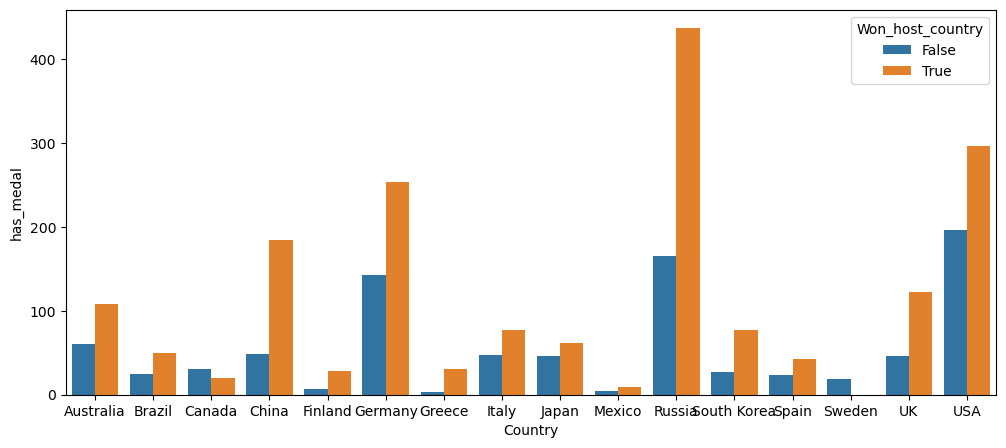

In [20]:
plt.figure(figsize=(12,5))
sns.barplot(df_hosted2, x = 'Country', y='has_medal', hue= 'Won_host_country')

**Question 5 bis** <br>
**Do you see a problem ?  Can you explain it ?**


In [23]:
#Sweden is in the dataset - that's okay as in 1956 Sweden was a co-organiser for the equestrian events due to strict regulations in the host country Australia.
dataset[(dataset['Country']=="Sweden") & (dataset['Year']==1956) & (dataset['Won_host_country'] == True)]

#Number of medals for the countries are big, the reason for that is that we consider a hosting country winning, if it has a medal. 
#So it doesn't necessarily mean that they won a gold, they could have also won a silver or bronze medal.
print(summer_after50[(summer_after50['Won_host_country']==True) & (summer_after50['has_medal']==True) & (summer_after50['Country'].isin(host_list))])

            ID                                   Name Sex   Age  Height  \
40          17                Paavo Johannes Aaltonen   M  32.0   175.0   
496        394                             Irene Abel   F  19.0   160.0   
778        582            Saypulla Atavovich Absaidov   M  22.0   168.0   
818        610                    Ginko Abukawa-Chiba   F  26.0   148.0   
834        618  Aleksandr Veniaminovich Abushakhmetov   M  25.0   189.0   
...        ...                                    ...  ..   ...     ...   
206509  135372                        Giovanni Zucchi   M  29.0   185.0   
206521  135379                 Erika Zuchold (Barth-)   F  25.0   158.0   
206523  135379                 Erika Zuchold (Barth-)   F  25.0   158.0   
206524  135379                 Erika Zuchold (Barth-)   F  25.0   158.0   
206573  135415                          Robertas ulpa   M  20.0   193.0   

        Weight          Team  NOC  Country        Games  Year  Season  \
40        64.0       Finla

In [48]:
df_host[(df_host['Country'] == 'Sweden') & (df_host['Won_host_country'] == True)]

,Country,Won_host_country,Year,has_medal
234,Sweden,True,1956,0


Sweden host the country but didn't win medal. for example, they hosted the OG in 1956 but didn't win a singe medal.
Sweden is in the dataset - that's okay as in 1956 Sweden was a co-organiser for the equestrian events due to strict reglations in the host country Australia.
Number of medals for the countries are big, the reason for that is that we consider a hosting country winning, if it has a medal. 
So it doesn't necessarily mean that they won a gold, they could have also won a silver or bronze medal.

**Question 6**: <br>
**Compute the correlation matrix of the numerical variables (int and float) in the dataframe** <br>
**Then, display this matrix with `sns.heatmap()`**

*Note: A correlation is high when its above 0.7*
- *You can use `numeric_only=True` to only use the numerical variables in `df.corr()`.*
- *You can use `plt.figure(figsize=(30,20))` to get a larger display of the heatmap.*

In [85]:
dataset.corr(numeric_only=True)

,ID,Age,Height,Weight,Year,Won_host_country,has_medal
ID,1.000000,-0.002088,-0.011812,-0.008825,0.007352,0.012934,0.017378
Age,-0.002088,1.000000,0.141516,0.211842,0.088878,-0.022361,0.028208
Height,-0.011812,0.141516,1.000000,0.796213,0.048954,0.003185,0.089429
Weight,-0.008825,0.211842,0.796213,1.000000,0.022649,-0.003525,0.088657
Year,0.007352,0.088878,0.048954,0.022649,1.000000,-0.087997,-0.033267
Won_host_country,0.012934,-0.022361,0.003185,-0.003525,-0.087997,1.000000,0.066562
has_medal,0.017378,0.028208,0.089429,0.088657,-0.033267,0.066562,1.000000


<Axes: >

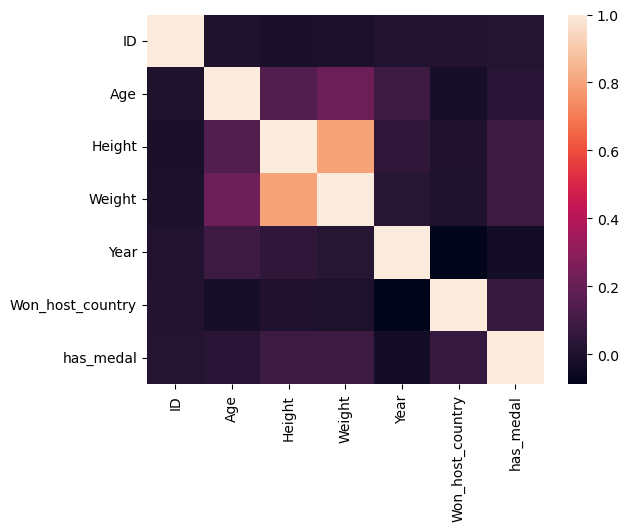

In [82]:
corr_matrix = dataset.corr(numeric_only=True)
sns.heatmap(corr_matrix)

**Did you identify highly correlated variables  ?**

Weight and height are highly correlated.

**Question 7:** <br>
**Display an bar chart showing the distribution of the age for the gold medal winners** <br>
You can use 'sns.countplot' <br>
(Optional Question) Display a better chart with a title, a 'xlabel', a 'ylabel' and display the count over the bar plot.
You can do this with "ax.patches"

In [31]:
dataset_gold = dataset[dataset["Medal"]=="Gold"]
dataset_gold.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Country,Games,Year,Season,City,Sport,Event,Medal,Host_country,Won_host_country,has_medal
32,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,Finland,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,UK,False,1
34,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,Finland,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,UK,False,1
38,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,Finland,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,UK,False,1
49,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Norway,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,NaN,False,1
62,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,Norway,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Super G,Gold,NaN,False,1


<Axes: xlabel='Age', ylabel='count'>

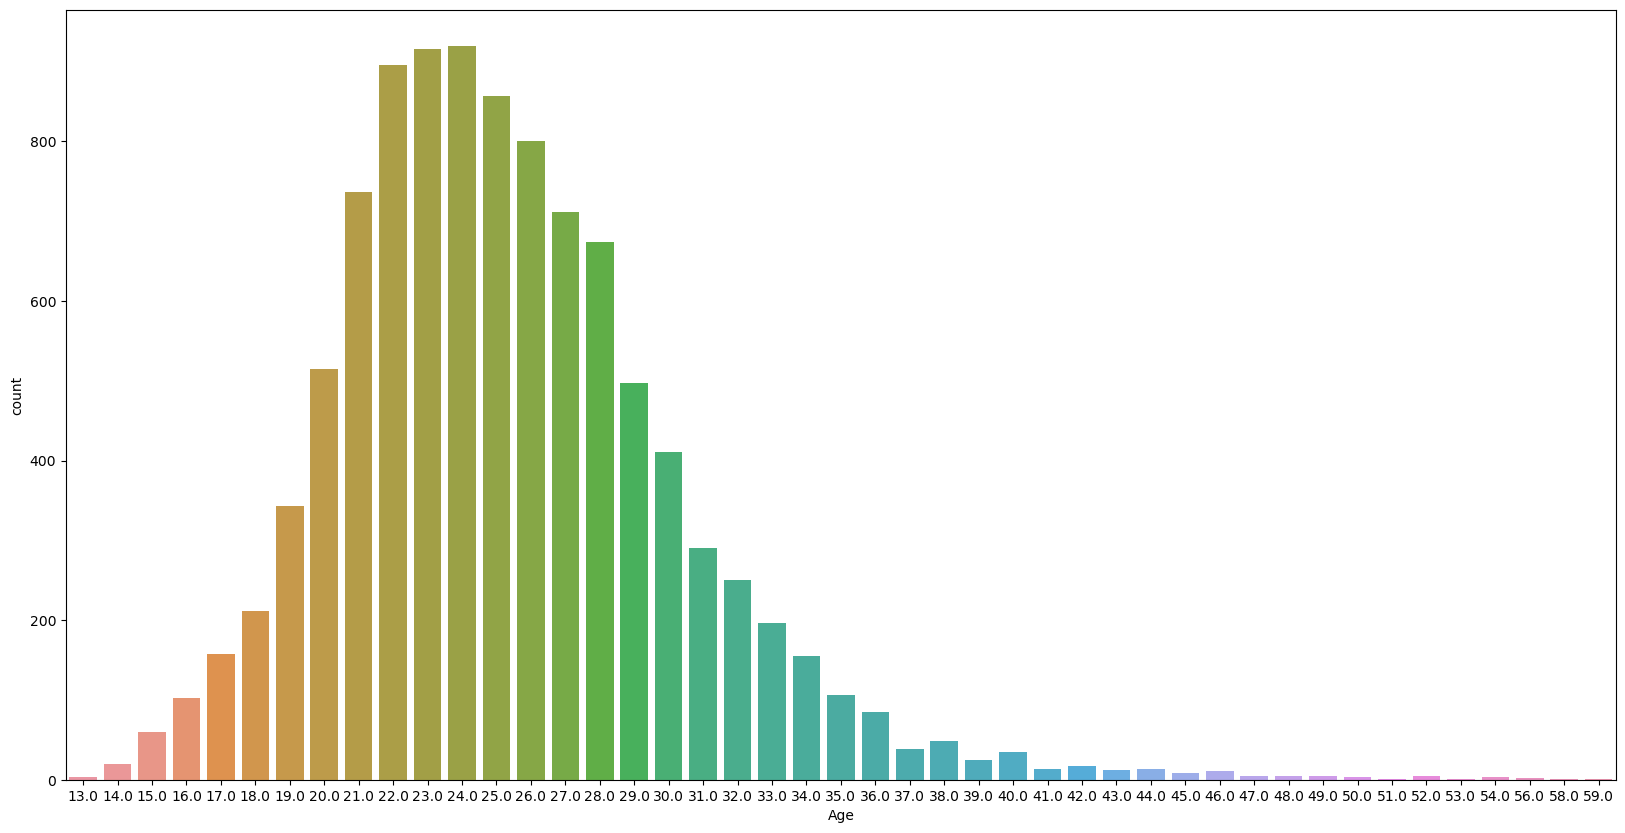

In [32]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'Age',
            data = dataset_gold)

**Question 8 (Bonus)**: <br>
**Do host countries win more medals when they are at home?
Display on a plot with sns.scatterplot in black the number of medals won by non-host countries for each edition, and in red for host countries.** <br>
Play with the transparency parameter. (alpha with sns.scatterplot), and the s parameter (dot size).

As a guide, alpha is between 0 and 1.
s should be between 50 and 150.

In [53]:

nothost_gold = dataset_gold[dataset_gold["Won_host_country"] == False].groupby('Year')['has_medal'].sum().to_frame()
nothost_gold = nothost_gold.reset_index()
nothost_gold

,Year,has_medal
0,1896,11
1,1900,17
2,1904,5
3,1906,28
4,1908,30
5,1912,43
6,1920,74
7,1924,66
8,1928,66
9,1932,27


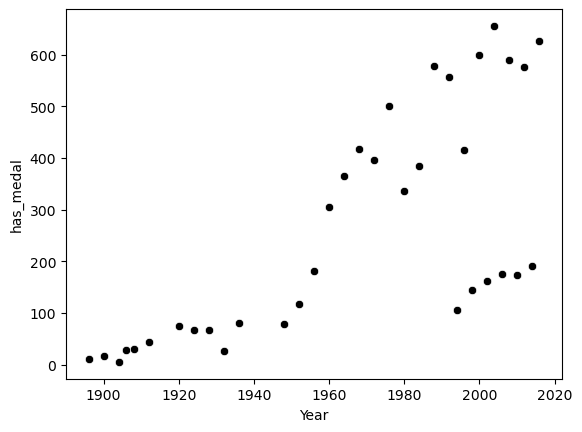

In [57]:
s1 = sns.scatterplot(x =nothost_gold['Year'], y = nothost_gold['has_medal'], color = 'black')

In [58]:
host_gold = dataset_gold[dataset_gold["Won_host_country"] == True].groupby('Year')['has_medal'].sum().to_frame()
host_gold = host_gold.reset_index()
host_gold

,Year,has_medal
0,1900,2
1,1904,29
2,1906,1
3,1908,25
4,1912,15
5,1920,4
6,1924,6
7,1928,1
8,1932,39
9,1936,7


<Axes: xlabel='Year', ylabel='has_medal'>

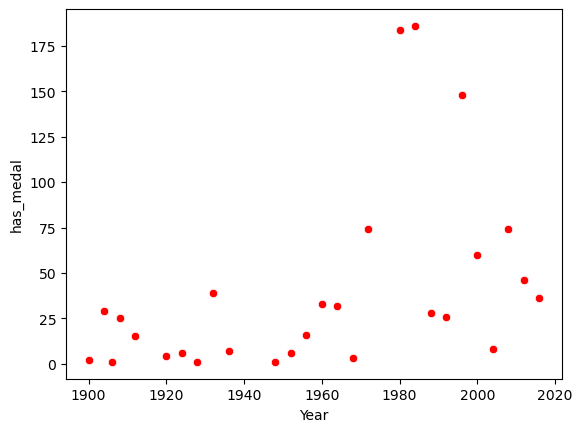

In [59]:
sns.scatterplot(x = host_gold['Year'], y = host_gold['has_medal'], color = 'red')

**Question 9 (Bonus)**: <br>
**Display an interactive choropleth map with each country, where the number of medal for each country is displayed with color.**

*Note: Use plotly's `px.choropleth()` function to make the map interactive with `locationmode='Country'`* <br>

The `locationmode` parameter is used to specify how the locations are defined in plotly's choropleth map. <br>
It determines how Plotly should interpret and match the locations in your data to the actual geographic locations on the map.

You can also display the country map by taking the log10 of the number of medals.

## 3. Expert Data visualization

The following question is also optional. Those who will complete it correctly will receive a bonus.

**Question 10 for expert** <br>
Use the folium, branca and geopandas packages to create an interactive map (folium.map).<br>
On this map, when you move the mouse over a country, a small display shows the country, the number of total medals, and the number of gold, silver and bronze medals. <br>
For the shape of the countries, we'll use polygons isssu from the code provided below. <br>

In [70]:
!pip install geopandas --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 5.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 72.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 81.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 51.9 MB/s eta 0:00:00:00:01


In [71]:
from folium.plugins import Search
from folium.plugins import HeatMap
import branca
import folium
from folium import plugins
import geopandas as gpd


# For geographic plotting
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'
global_polygons = gpd.read_file(country_shapes)
global_polygons.to_file('global_polygons.geojson', driver = 'GeoJSON')


#Dataset to create
#Usefull and style function to built

m = folium.Map(location=(50,0),zoom_start=3)




Map_Layer = folium.GeoJson(##to complete
)



plugins.Search(## To complete
        ).add_to(m)


minimap = plugins.MiniMap()
m.add_child(minimap)
folium.LayerControl().add_to(m)
colormap.add_to(m)
m

TypeError: GeoJson.__init__() missing 1 required positional argument: 'data'

**Now you can display other graphs as you see fit.**